In [1]:
# 📦 Import required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 📡 Retrieve data from the Raydium API
def get_all_pools_data():
    url = "https://api.raydium.io/pairs"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error calling Raydium API.")
        return []

print("Loading data from Raydium...")
raw_data = get_all_pools_data()
df = pd.DataFrame(raw_data)

# 🧹 Clean and convert numerical columns
df["tvl"] = pd.to_numeric(df.get("liquidity", None), errors="coerce")
df["price"] = pd.to_numeric(df.get("price", None), errors="coerce")
df["volume24h"] = pd.to_numeric(df.get("volume24h", None), errors="coerce")

Loading data from Raydium...


📊 Graph 1 – Top 10 pools by TVL


,name,tvl,price
348801,SLERF/WSOL,4.805989e+07,4.971071e-04
441273,MEW/WSOL,3.420987e+07,2.255768e-05
208663,BOME/WSOL,3.058199e+07,1.317849e-05
555426,smole/WSOL,3.056801e+07,2.212859e-07
282011,WSOL/Fartcoin,2.571596e+07,1.266081e+02
172785,$WIF/WSOL,1.614892e+07,6.367888e-03
562682,WSOL/USDC,1.369927e+07,1.783432e+02
127918,POPCAT/WSOL,1.340652e+07,2.699440e-03
129481,$NAP/WSOL,1.128547e+07,2.223537e-08
600514,WSOL/Pnut,1.029649e+07,5.244575e+02


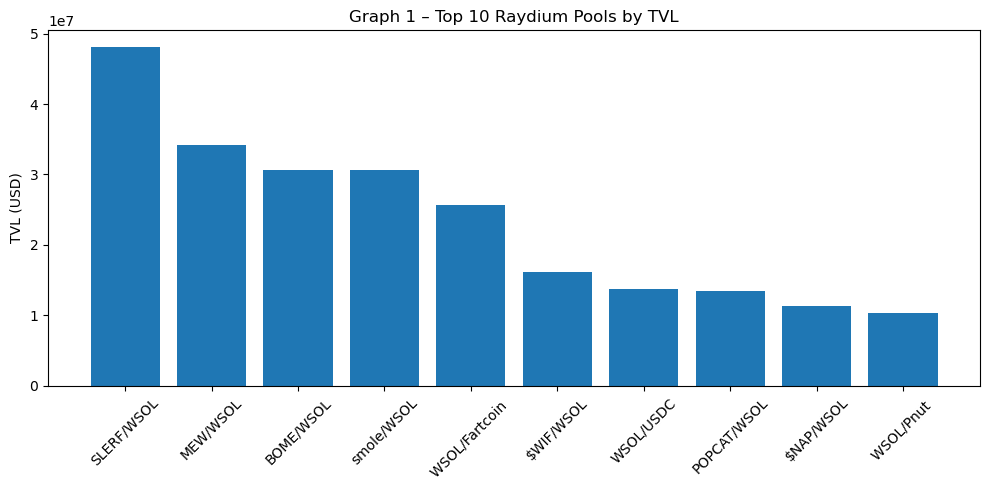

In [2]:
# 📊 Graph 1 – Top 10 pools by Total Value Locked (TVL)
top_tvl = df.sort_values(by="tvl", ascending=False).head(10)

print("📊 Graph 1 – Top 10 pools by TVL")
display(top_tvl[["name", "tvl", "price"]])

plt.figure(figsize=(10, 5))
plt.bar(top_tvl["name"], top_tvl["tvl"])
plt.xticks(rotation=45)
plt.ylabel("TVL (USD)")
plt.title("Graph 1 – Top 10 Raydium Pools by TVL")
plt.tight_layout()
plt.show()

📊 Graph 2 – Pairs with the highest token unit price


,name,price,tvl
660116,WSOL/BULLANA,3.193043e+25,0.000002
208490,WSOL/GRAV,2.499934e+25,0.000001
96844,WSOL/Goku,1.250000e+25,0.000003
648280,WSOL/BGME,1.048493e+25,0.000003
120447,WSOL/GNUTS,2.495495e+24,0.000001
470501,WSOL/BRICK,2.500000e+22,0.000007
195701,WSOL/LONG,1.511233e+22,0.002249
10285,WSOL/KINGU,8.064483e+21,0.000044
39611,WSOL/WLFI,2.798593e+21,0.000026
144372,WSOL/Socks,1.878528e+21,0.000190


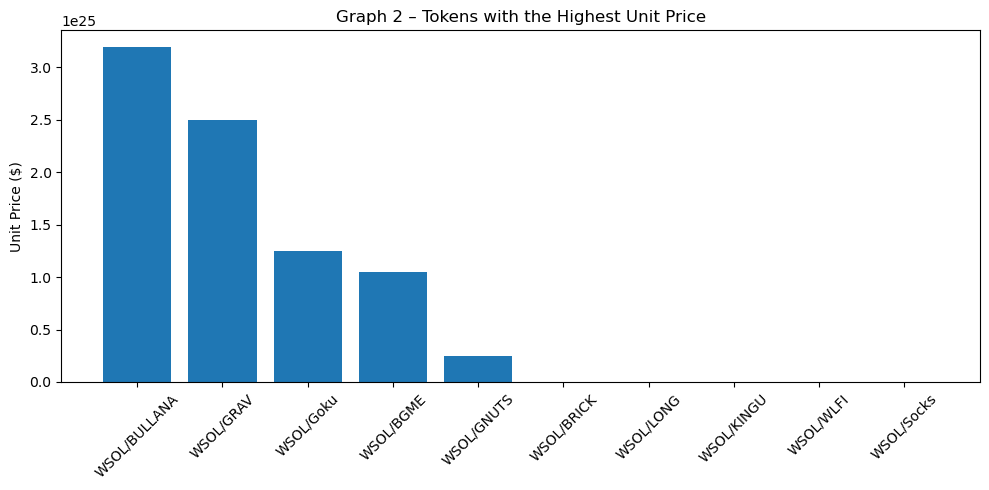

In [3]:
# 📊 Graph 2 – Tokens with the highest unit price
top_prices = df.sort_values(by="price", ascending=False).head(10)

print("📊 Graph 2 – Pairs with the highest token unit price")
display(top_prices[["name", "price", "tvl"]])

plt.figure(figsize=(10, 5))
plt.bar(top_prices["name"], top_prices["price"])
plt.xticks(rotation=45)
plt.ylabel("Unit Price ($)")
plt.title("Graph 2 – Tokens with the Highest Unit Price")
plt.tight_layout()
plt.show()

📊 Graph 3 – Popular low-priced tokens (TVL > 1M & price < 0.01)


,name,tvl,price
348801,SLERF/WSOL,4.805989e+07,4.971071e-04
441273,MEW/WSOL,3.420987e+07,2.255768e-05
208663,BOME/WSOL,3.058199e+07,1.317849e-05
555426,smole/WSOL,3.056801e+07,2.212859e-07
172785,$WIF/WSOL,1.614892e+07,6.367888e-03
127918,POPCAT/WSOL,1.340652e+07,2.699440e-03
129481,$NAP/WSOL,1.128547e+07,2.223537e-08
123781,LIKE/WSOL,9.152261e+06,2.596899e-06
681820,MANEKI/WSOL,8.281892e+06,9.992501e-06
447956,PUNDU/WSOL,7.422296e+06,2.299009e-05


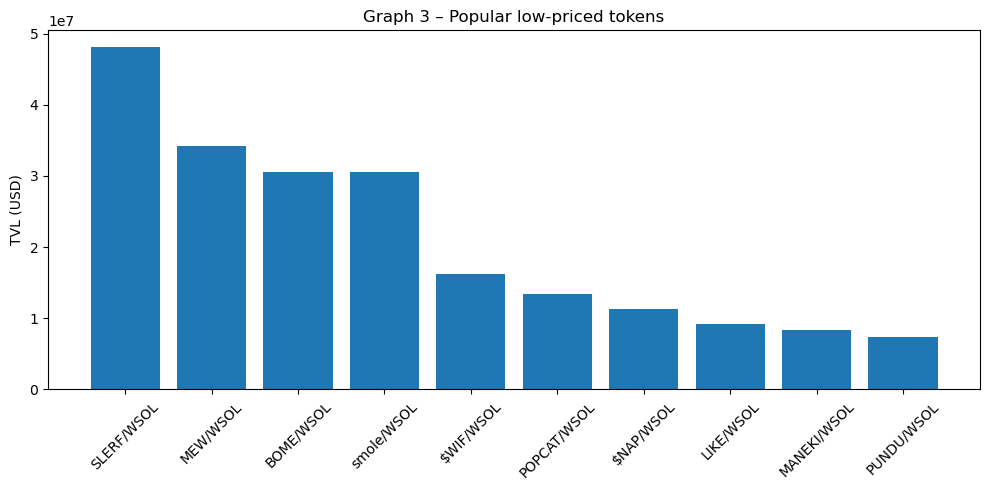

In [4]:
# 📊 Graph 3 – Popular low-priced tokens with significant TVL
filtered_low_price = df[
    (df["tvl"] > 1_000_000) & 
    (df["price"] < 0.01)
].sort_values(by="tvl", ascending=False).head(10)

print("📊 Graph 3 – Popular low-priced tokens (TVL > 1M & price < 0.01)")
display(filtered_low_price[["name", "tvl", "price"]])

plt.figure(figsize=(10, 5))
plt.bar(filtered_low_price["name"], filtered_low_price["tvl"])
plt.xticks(rotation=45)
plt.ylabel("TVL (USD)")
plt.title("Graph 3 – Popular low-priced tokens")
plt.tight_layout()
plt.show()